# Introduction to Pytorch

<img src="images/pytorhc_vs_tensorflow.png" width="500px"></img>

In [29]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Recall Gradient Descent

- [Formation au Deep Learning](https://www.youtube.com/playlist?list=PLpEPgC7cUJ4b1ARx8PyIQa_sdZRL2GXw5)
- [Formation Tensorflow 2.0](https://www.youtube.com/playlist?list=PLpEPgC7cUJ4byTM5kGA0Te1jUeNwbSgfd)
- [DESCENTE DE GRADIENT (GRADIENT DESCENT) - ML#4](https://www.youtube.com/watch?v=rcl_YRyoLIY&t=3s)
- [La descente de gradient (stochastique) | Intelligence artificielle 42](https://www.youtube.com/watch?v=Q9-vDFvDdfg)

### A simple function to minimize

C:\Users\Thibault\Anaconda3\envs\ai-3.7\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'color'
  del sys.path[0]


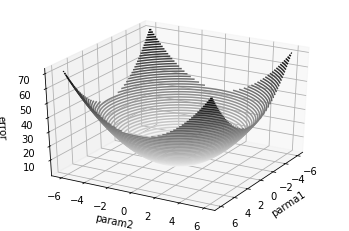

In [32]:
def f(x, y):
    return x ** 2 + y ** 2

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)

Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour(X, Y, Z, 50, cmap='binary', color="r")
ax.set_xlabel('parma1')
ax.set_ylabel('param2')
ax.set_zlabel('error')

ax.view_init(30, 30)

### Create the two variables

In [37]:
x = torch.tensor(3, dtype=torch.float, requires_grad=True)
y = torch.tensor(3, dtype=torch.float, requires_grad=True)

### Minimize the function by applying gradient descent

<img src="images/intro_pytorch_gradient_descent.png" width="700px"></img>

In [50]:
for i in range(100):
    # Compute the operation. We want to minimise the result. To do so we can compute
    # the gradient of each variable and apply the gradient descent formula.
    result = x**2 + y**2
    print("Result = >>", result)
    
    # Compute the gradient for each operations made before
    result.backward()
    
    # Apply gradient descent without tracking the gradient.
    with torch.no_grad():
        x -= 0.1*x.grad
        y -= 0.1*y.grad
        
    x.grad.zero_()
    y.grad.zero_()

Result = >> tensor(11.5200, grad_fn=<AddBackward0>)
Result = >> tensor(7.3728, grad_fn=<AddBackward0>)
Result = >> tensor(4.7186, grad_fn=<AddBackward0>)
Result = >> tensor(3.0199, grad_fn=<AddBackward0>)
Result = >> tensor(1.9327, grad_fn=<AddBackward0>)
Result = >> tensor(1.2370, grad_fn=<AddBackward0>)
Result = >> tensor(0.7916, grad_fn=<AddBackward0>)
Result = >> tensor(0.5067, grad_fn=<AddBackward0>)
Result = >> tensor(0.3243, grad_fn=<AddBackward0>)
Result = >> tensor(0.2075, grad_fn=<AddBackward0>)
Result = >> tensor(0.1328, grad_fn=<AddBackward0>)
Result = >> tensor(0.0850, grad_fn=<AddBackward0>)
Result = >> tensor(0.0544, grad_fn=<AddBackward0>)
Result = >> tensor(0.0348, grad_fn=<AddBackward0>)
Result = >> tensor(0.0223, grad_fn=<AddBackward0>)
Result = >> tensor(0.0143, grad_fn=<AddBackward0>)
Result = >> tensor(0.0091, grad_fn=<AddBackward0>)
Result = >> tensor(0.0058, grad_fn=<AddBackward0>)
Result = >> tensor(0.0037, grad_fn=<AddBackward0>)
Result = >> tensor(0.0024, gra

In [51]:
print(x, y)

tensor(4.8889e-10, requires_grad=True) tensor(4.8889e-10, requires_grad=True)


## Simple neural network on MNIST

In [52]:
from torchvision import datasets, transforms
import torch.nn.functional as F

### Import the dataset

<img src="images/intro_pytorch_mnist.png" width="500px"></img>

In [53]:
# Transform each image into tensor and normalized with mean and std
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
# Define the batch size used each time we go through the dataset
batch_size = 32

# Set the training loader
train_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=True, download=True, transform=transform), batch_size=batch_size, shuffle=True)
# Set the testing loader
test_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=False, download=True, transform=transform), batch_size=batch_size, shuffle=True)

### Init the weights

In [56]:
## Init weights
# 784 because there is 784 pixels in each image
# 10 because there is 10 possible outputs : 0,1,2,3,4,5,6,7,8,9
# Each pixel is linked to 10 outputs where each link is a weight to optimize\
# <=> Each class is linked to 784 pixel where each link is a weight to optimize
weights = torch.randn(784, 10, requires_grad=True)

### Compute the accuracy on the test set

<img src="images/intro_pytorch_mnist_operations.png" width="600px"></img>

In [83]:
def test(weights, test_loader):
    test_size = len(test_loader.dataset)
    correct = 0

    for batch_idx, (data, target) in enumerate(test_loader):
        #print(batch_idx, data.shape, target.shape)
        data = data.view((-1, 28*28))
        #print(batch_idx, data.shape, target.shape)

        outputs = torch.matmul(data, weights)
        softmax = F.softmax(outputs, dim=1)
        pred = softmax.argmax(dim=1, keepdim=True)
        n_correct = pred.eq(target.view_as(pred)).sum().item()
        correct += n_correct

    acc = correct / test_size
    print(" Accuracy on test set", acc)
    return

test(weights, test_loader)

 Accuracy on test set 0.0816


### Train the model

<img src="images/intro_pytorch_negativeloglikelihood.png" width="600px"></img>

In [98]:
it = 0
for batch_idx, (data, targets) in enumerate(train_loader):
    # Be sure to start the loop with zeros grad
    if weights.grad is not None:
        weights.grad.zero_()
    
    data = data.view((-1, 28*28))
    #print("batch_idx: {}, data.shape: {}, target.shape: {}".format(batch_idx, data.shape, targets.shape))
    outputs = torch.matmul(data, weights)
    #print("outputs.shape: {}".format(outputs.shape))

    log_softmax = F.log_softmax(outputs, dim=1)
    #print("Log softmax: {}".format(log_softmax.shape))

    #print((-log_softmax[0][targets[0]] + -log_softmax[1][targets[1]] )  / 2 )
    #print(-log_softmax[0][targets[0]], targets[0])
    
    loss = F.nll_loss(log_softmax, targets)
    print("\rLoss shape: {}".format(loss), end="")
    
    # Compute the gradients for each variables
    loss.backward()
    
    with torch.no_grad():
        weights -= 0.1*weights.grad
        
    it += 1
    if it % 100 == 0:
        test(weights, test_loader)
        
    if it > 5000:
        break

Loss shape: 5.5470104217529375 Accuracy on test set 0.6676
Loss shape: 3.7371554374694824 Accuracy on test set 0.7678
Loss shape: 3.7003250122070312 Accuracy on test set 0.7969
Loss shape: 3.63990139961242685 Accuracy on test set 0.825
Loss shape: 2.156468629837036787 Accuracy on test set 0.8363
Loss shape: 1.54896616935729985 Accuracy on test set 0.8345
Loss shape: 2.52677869796752935 Accuracy on test set 0.842
Loss shape: 2.875357151031494713 Accuracy on test set 0.8573
Loss shape: 0.84983670711517333 Accuracy on test set 0.8513
Loss shape: 0.92615586519241333 Accuracy on test set 0.8582
Loss shape: 1.82365214824676517 Accuracy on test set 0.8635
Loss shape: 0.69127744436264046 Accuracy on test set 0.8644
Loss shape: 1.83464241027832034 Accuracy on test set 0.8613
Loss shape: 0.3489245176315307666 Accuracy on test set 0.8659
Loss shape: 1.96130001544952487 Accuracy on test set 0.8691
Loss shape: 0.52960449457168586 Accuracy on test set 0.8714
Loss shape: 2.4448368549346924447 Accurac

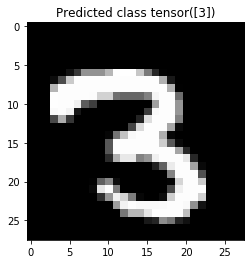

In [111]:
import matplotlib.pyplot as plt

batch_idx, (data, target) = next(enumerate(test_loader))
data = data.view((-1, 28*28))

outputs = torch.matmul(data, weights)
softmax = F.softmax(outputs, dim=1)
pred = softmax.argmax(dim=1, keepdim=True)

plt.imshow(data[0].view(28, 28), cmap="gray")
plt.title("Predicted class {}".format(pred[0]))
plt.show()